# Video: Receiver Operating Characteristic (ROC) Curves

This video introduces receiver operating characteristic curves (ROC curves) as a way to visualize tradeoffs between true positive and false positive rates.

## Receiver Operating Characteristic (ROC) Curves


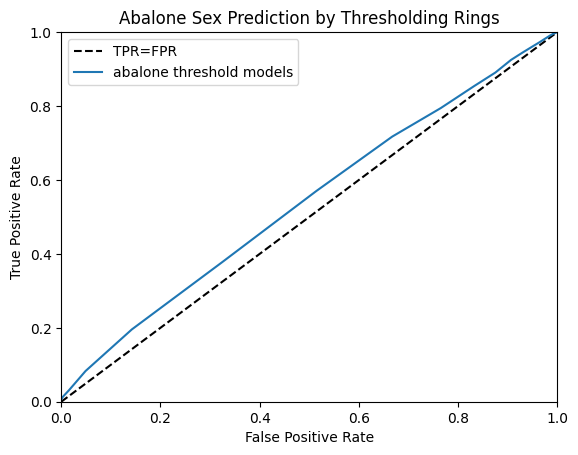

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

abalone_data = pd.read_csv("https://raw.githubusercontent.com/bu-cds-omds/dx601-examples/main/data/abalone.tsv", sep="\t")
abalone_data = abalone_data.query("Sex in ('M', 'F')")

roc_data = []

for rings_threshold in sorted(set(abalone_data["Rings"])):
    prediction = abalone_data["Rings"] <= rings_threshold
    target = abalone_data["Sex"] == "M"

    positives = abalone_data["Sex"] == "M"
    negatives = abalone_data["Sex"] != "M"

    true_positives = prediction & positives
    false_positives = prediction & negatives

    false_positive_rate = sum(false_positives) / sum(negatives)
    true_positive_rate = sum(true_positives) / sum(positives)

    # print("THRESHOLD", rings_threshold, "FPR", false_positive_rate, "TPR", true_positive_rate)
    roc_data.append((false_positive_rate, true_positive_rate, rings_threshold))

roc_optimal = roc_data.copy()
roc_optimal.sort()
i = 1
while i < len(roc_optimal):
    if roc_optimal[i-1][0] == roc_optimal[i][0]:
        # same FPR, have better TPR
        roc_optimal[i-1:i] = []
    elif roc_optimal[i-1][1] >= roc_optimal[i][1]:
        # previous has lower FPR and higher TPR
        roc_optimal[i:i+1] = []
    else:
        # prefix looks good
        i = i + 1

plt.plot([0, 1], [0, 1], label="TPR=FPR", color="black", linestyle="--")
plt.plot([r[0] for r in roc_optimal], [r[1] for r in roc_optimal], label="abalone threshold models")

plt.gca().set_xlim(0, 1)
plt.gca().set_ylim(0, 1)

plt.legend()
plt.title("Abalone Sex Prediction by Thresholding Rings")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

None

Script:
* The receiver operating characteristic curve, or ROC curve for short, is a way to visualize the tradeoffs between true positive and false positive rates.
* The long name comes from the original application, detecting mines on a battlefield, where they were looking at tradeoffs adjusting the receiver sensitivity.
* Now, we just call them ROC curves and use them to look at model tradeoffs between true positives and false positives.
* Mostly this is done for binary classifiers, deciding whether an example belongs to a class of interest or not.
* This visualization is not used often for hypothesis testing, but should help you think about the tradeoffs involved.

## Abalone Revisited


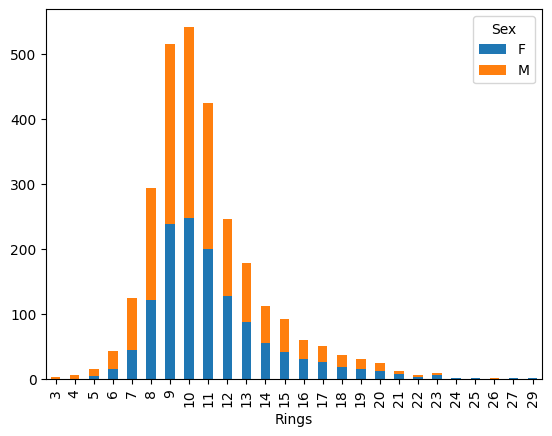

In [ ]:
abalone_data[["Sex", "Rings"]].pivot_table(index=["Rings"], columns=["Sex"], aggfunc="size", fill_value=0).plot(kind="bar", stacked=True)
None

* At the beginning of this course, one of the example problems was predicting the sex of an abalone based on number of rings on its shell.
* A suggestion from the readings was to pick a threshold number of rings since abalone with more rings tended to be female more often.
* Let's walk through the process of comparing different thresholds' performance by building the ROC curves.

## Abalone Modeling


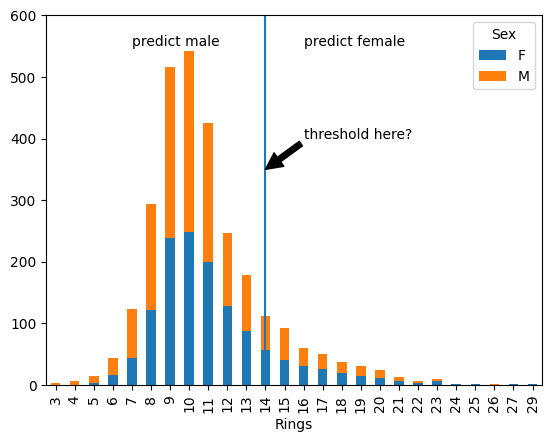

In [ ]:
abalone_data[["Sex", "Rings"]].pivot_table(index=["Rings"], columns=["Sex"], aggfunc="size", fill_value=0).plot(kind="bar", stacked=True)
plt.gca().axvline(x=11)
plt.gca().set_ylim((0, 600))
plt.annotate("threshold here?", xy=(11,350), xytext=(13,400), arrowprops=dict(facecolor='black'))
plt.annotate("predict male", xy=(4, 550))
plt.annotate("predict female", xy=(13,550))
None

Script:
* Previously, it was observed that abalone with more rings are female more often than male.
* So it was proposed that we pick a threshold, and predict female if the number of rings was at or over the threshold, and male otherwise.
* If we start with a very low threshold, then we predict all the abalone are female, but make mistakes on all the males.
* If we start with a very high threshold, then we predict all the abalone are male, but make mistakes on all the females.
* Obviously, neither of those are good choices, and if we are building a model like this, we should pick a better threshold in the middle.
* But how do we decide that?

## True Positive Rates vs False Positive Rates


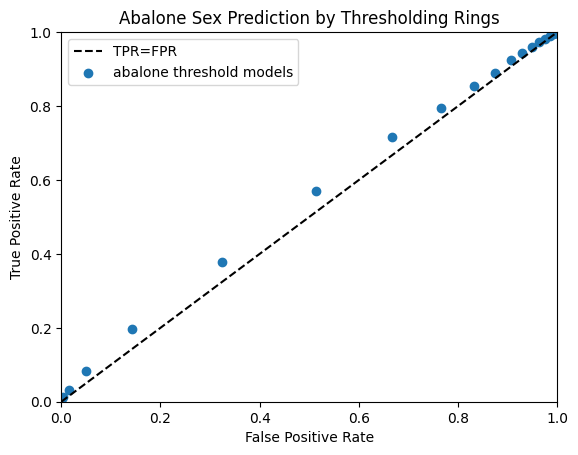

In [ ]:
plt.plot([0, 1], [0, 1], label="TPR=FPR", color="black", linestyle="--")
plt.scatter([r[0] for r in roc_data], [r[1] for r in roc_data], label="abalone threshold models")

plt.gca().set_xlim(0, 1)
plt.gca().set_ylim(0, 1)
plt.legend()
plt.title("Abalone Sex Prediction by Thresholding Rings")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
None

* One way to compare the models is to plot their true positive rates and false positive rates.
* This is not quite a ROC curve, but the right kind of data is being shown now.
* This chart shows all the thresholds from 1 to 30 rings.
* The 1 ring threshold will predict all the abalone are female, and the 30 ring threshold will predict all the abalone are male.
* You can do similar analysis with other measures such as false negative rates and false positive rates ($\alpha$ and $\beta$) but comparing true and false positive rates is most common, and what will be shown in a ROC curve.

## Pareto Optimal Choices


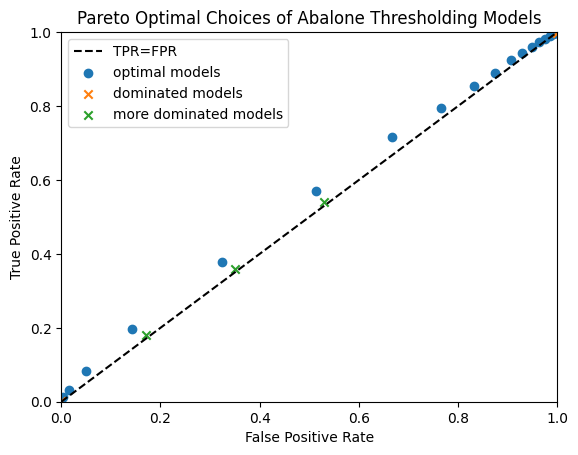

In [ ]:
roc_optimal_rates = set(r[:2] for r in roc_optimal)
dominated_data = [r for r in roc_data if r[:2] not in roc_optimal_rates]

plt.plot([0, 1], [0, 1], label="TPR=FPR", color="black", linestyle="--")
plt.scatter([r[0] for r in roc_optimal], [r[1] for r in roc_optimal], label="optimal models")
plt.scatter([r[0] for r in dominated_data], [r[1] for r in dominated_data], label="dominated models", marker="x")
plt.scatter([0.17, 0.35, 0.53], [0.18, 0.36, 0.54], label="more dominated models", marker="x")

plt.gca().set_xlim(0, 1)
plt.gca().set_ylim(0, 1)
plt.legend()
plt.title("Pareto Optimal Choices of Abalone Thresholding Models")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
None

Script:
* Some of these model choices are clearly not very good.
* If we are evaluating them just on true and false positive rates, we can eliminate the models that are dominated by other models.
* That is, if you compare two models and the first one has a higher true positive rate and a lower false positive rate, then you would never use the second one.
* Because the first one is better in every way that we are considering.
* This leaves us with a set of models where we can only increase true positive rates by increasing false positive rates, and we can only decrease false negative rates by decreasing true positive rates.
* This is an example of Pareto optimality by the way.

## Receiver Operating Characteristic (ROC) Curves


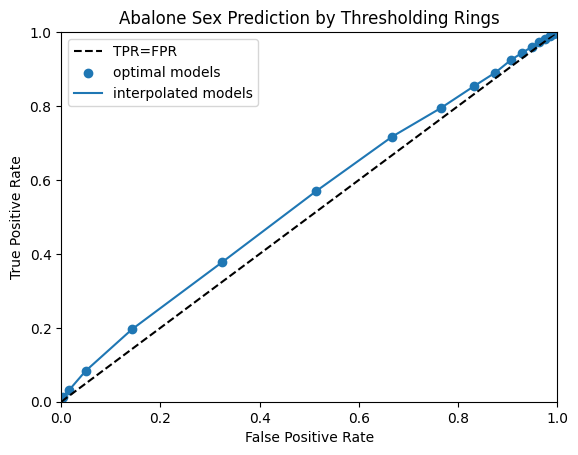

In [ ]:
plt.plot([0, 1], [0, 1], label="TPR=FPR", color="black", linestyle="--")
plt.scatter([r[0] for r in roc_optimal], [r[1] for r in roc_optimal], label="optimal models")
plt.plot([r[0] for r in roc_optimal], [r[1] for r in roc_optimal], label="interpolated models")

plt.gca().set_xlim(0, 1)
plt.gca().set_ylim(0, 1)
plt.legend()
plt.title("Abalone Sex Prediction by Thresholding Rings")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

None


Script:
* If we connect all these points together, we now have the ROC curve.
* For any pair of models, we can linearly interpolate between them and make a new model with those measures.
* Only adjacent pairs of models should be interpolated, or you will get worse models than you started with.
* How do you interpolate between models?


## Model Interpolation via Blending


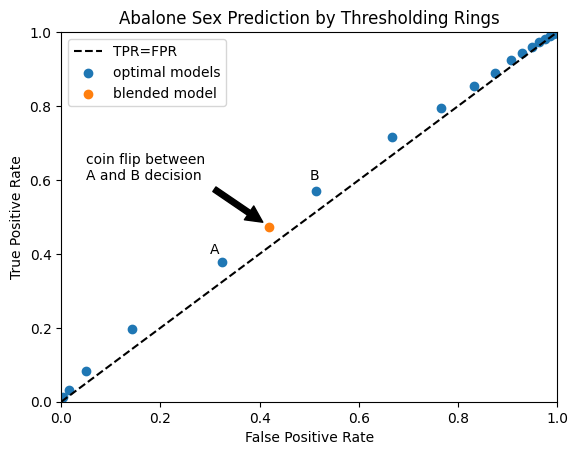

In [ ]:
import numpy as np

plt.plot([0, 1], [0, 1], label="TPR=FPR", color="black", linestyle="--")
plt.scatter([r[0] for r in roc_optimal], [r[1] for r in roc_optimal], label="optimal models")
#plt.plot([r[0] for r in roc_optimal], [r[1] for r in roc_optimal], label="interpolated models")


plt.annotate("A", xy=(0.3, 0.4))
plt.annotate("B", xy=(0.5, 0.6))

mid = [r for r in roc_optimal if 0.3 <= r[0] <= 0.6]
mid = mid[:2]
mid = np.asarray(mid)
mid = mid.mean(axis=0)

plt.scatter(mid[0], mid[1], label="blended model", marker="o")
plt.annotate("coin flip between\nA and B decision",
             xy=tuple(mid[:2]),
             xytext=(0.05, 0.6),
             arrowprops=dict(facecolor='black',
                             shrink=0.1))

plt.gca().set_xlim(0, 1)
plt.gca().set_ylim(0, 1)
plt.legend()
plt.title("Abalone Sex Prediction by Thresholding Rings")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

None


Script:
* The easiest way is for the new model to flip a coin and return the first model's output if it says heads and the second model's output if it says tails.
* You can get any point between the original models by biasing the coin.
* The catch is whether you are confident you know which models should be blended.

## Model Interpolation via Sliding Thresholds


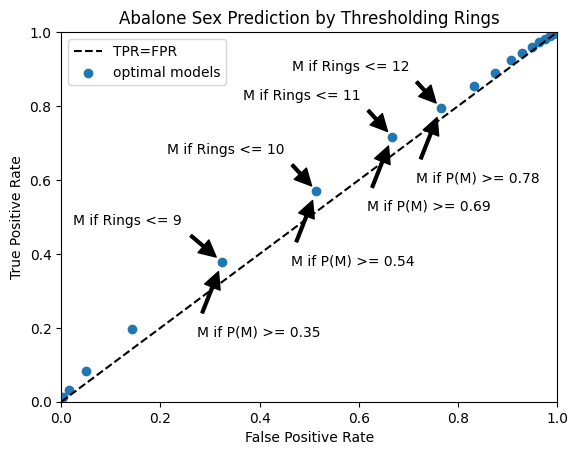

In [ ]:
for r in roc_optimal:
    if 9 <= r[2] <= 12:
        plt.annotate(f"M if Rings <= {r[2]}",
                     xy=r[:2],
                     xytext=(r[0] - 0.3, r[1]+0.1),
                     arrowprops=dict(facecolor='black',
                                     shrink=0.15,
                                     width=2))

        plt.annotate(f"M if P(M) >= {(r[0]+r[1])/2:.2f}",
                     xy=r[:2],
                     xytext=(r[0] - 0.05, r[1]-0.2),
                     arrowprops=dict(facecolor='black',
                                     shrink=0.15,
                                     width=2))

plt.plot([0, 1], [0, 1], label="TPR=FPR", color="black", linestyle="--")
plt.scatter([r[0] for r in roc_optimal], [r[1] for r in roc_optimal], label="optimal models")

plt.gca().set_xlim(0, 1)
plt.gca().set_ylim(0, 1)
plt.legend()
plt.title("Abalone Sex Prediction by Thresholding Rings")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

None


Script:
* In binary classification, you will often be predicting a probability instead of the two classes directly, and can get the whole ROC curve just by varying your threshold.